<h1>Machine Learning for Skin Type Detection<h1>

This is the code for making machine learning model for skin type detection

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import sklearn.metrics
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
#Link dari file skin disease adalah https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-type.zip?raw=true

!wget --no-check-certificate \
    "https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-type2.zip?raw=true" \
    -O "/tmp/skin-type.zip"

--2022-05-24 11:43:55--  https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-type2.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/TegarNH/Capstone-Project-C22-PS135/raw/main/ML/Data/skin-type2.zip [following]
--2022-05-24 11:43:55--  https://github.com/TegarNH/Capstone-Project-C22-PS135/raw/main/ML/Data/skin-type2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TegarNH/Capstone-Project-C22-PS135/main/ML/Data/skin-type2.zip [following]
--2022-05-24 11:43:55--  https://raw.githubusercontent.com/TegarNH/Capstone-Project-C22-PS135/main/ML/Data/skin-type2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubuserco

In [3]:
local_zip = '/tmp/skin-type.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
source_path = '/tmp/skin-type2'

source_path_dry = os.path.join(source_path, 'Dry')
source_path_normal = os.path.join(source_path, 'Normal')
source_path_oily = os.path.join(source_path, 'Oily')
source_path_sensitive = os.path.join(source_path, 'Sensitive')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dry))} images of dry skin.")
print(f"There are {len(os.listdir(source_path_normal))} images of normal skin.")
print(f"There are {len(os.listdir(source_path_oily))} images of oily skin.")
print(f"There are {len(os.listdir(source_path_sensitive))} images of sensitive skin.")

There are 69 images of dry skin.
There are 100 images of normal skin.
There are 102 images of oily skin.
There are 100 images of sensitive skin.


In [5]:
# Define root directory
root_dir = '/tmp/skin-type-train-test'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE
  training_path = 'training'
  testing_path = 'testing'
  dry_path = 'dry'
  normal_path = 'normal'
  oily_path = 'oily'
  sensitive_path = 'sensitive'
  path_arr = [testing_path, training_path]
  path_arr2 = [dry_path, normal_path, oily_path, sensitive_path]

  try:
    for path1 in path_arr:
      path_first = os.path.join(root_path, path1)
      if os.path.isdir(path_first):
        break
      os.makedirs(path_first)
      for path2 in path_arr2:
        path_second = os.path.join(path_first, path2)
        if os.path.isdir(path_second):
          break
        os.makedirs(path_second)
  except OSError:
    pass

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter


  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

italicized text

In [6]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/skin-type-train-test/testing
/tmp/skin-type-train-test/training
/tmp/skin-type-train-test/testing/dry
/tmp/skin-type-train-test/testing/normal
/tmp/skin-type-train-test/testing/oily
/tmp/skin-type-train-test/testing/sensitive
/tmp/skin-type-train-test/training/dry
/tmp/skin-type-train-test/training/normal
/tmp/skin-type-train-test/training/oily
/tmp/skin-type-train-test/training/sensitive


In [7]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  list_file = []
  for filename in os.listdir(SOURCE):
    path = SOURCE + filename
    if os.path.getsize(path) > 0:
      list_file.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))

  number_of_files = len(list_file)
  split = int(number_of_files * SPLIT_SIZE)

  shuffle = random.sample(list_file, number_of_files)
  train_file = shuffle[:split]
  test_file = shuffle[split:]

  for filename in train_file:
    copyfile(SOURCE + filename, TRAINING + filename)
  for filename in test_file:
    copyfile(SOURCE + filename, TESTING + filename)



  ### END CODE HERE


In [8]:
# Test your split_data function

# Define paths
DRY_SOURCE_DIR = "/tmp/skin-type2/Dry/"
NORMAL_SOURCE_DIR = "/tmp/skin-type2/Normal/"
OILY_SOURCE_DIR = "/tmp/skin-type2/Oily/"
SENSITIVE_SOURCE_DIR = "/tmp/skin-type2/Sensitive/"

TRAINING_DIR = "/tmp/skin-type-train-test/training/"
TESTING_DIR = "/tmp/skin-type-train-test/testing/"

TRAINING_DRY_DIR = os.path.join(TRAINING_DIR, "dry/")
TESTING_DRY_DIR = os.path.join(TESTING_DIR, "dry/")

TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "normal/")
TESTING_NORMAL_DIR = os.path.join(TESTING_DIR, "normal/")

TRAINING_OILY_DIR = os.path.join(TRAINING_DIR, "oily/")
TESTING_OILY_DIR = os.path.join(TESTING_DIR, "oily/")

TRAINING_SENSITIVE_DIR = os.path.join(TRAINING_DIR, "sensitive/")
TESTING_SENSITIVE_DIR = os.path.join(TESTING_DIR, "sensitive/")

In [9]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_DRY_DIR)) > 0:
  for file in os.scandir(TRAINING_DRY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NORMAL_DIR)) > 0:
  for file in os.scandir(TRAINING_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_OILY_DIR)) > 0:
  for file in os.scandir(TRAINING_OILY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SENSITIVE_DIR)) > 0:
  for file in os.scandir(TRAINING_SENSITIVE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DRY_DIR)) > 0:
  for file in os.scandir(TESTING_DRY_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_NORMAL_DIR)) > 0:
  for file in os.scandir(TESTING_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_OILY_DIR)) > 0:
  for file in os.scandir(TESTING_OILY_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SENSITIVE_DIR)) > 0:
  for file in os.scandir(TESTING_SENSITIVE_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(DRY_SOURCE_DIR, TRAINING_DRY_DIR, TESTING_DRY_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size)
split_data(OILY_SOURCE_DIR, TRAINING_OILY_DIR, TESTING_OILY_DIR, split_size)
split_data(SENSITIVE_SOURCE_DIR, TRAINING_SENSITIVE_DIR, TESTING_SENSITIVE_DIR, split_size)

print(f"There are {len(os.listdir(TRAINING_DRY_DIR))} images of dry for training")
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")
print(f"There are {len(os.listdir(TRAINING_OILY_DIR))} images of oily for training")
print(f"There are {len(os.listdir(TRAINING_SENSITIVE_DIR))} images of sensitive for training")

print(f"There are {len(os.listdir(TESTING_DRY_DIR))} images of dry for testing")
print(f"There are {len(os.listdir(TESTING_NORMAL_DIR))} images of normal for testing")
print(f"There are {len(os.listdir(TESTING_OILY_DIR))} images of oily for testing")
print(f"There are {len(os.listdir(TESTING_SENSITIVE_DIR))} images of sensitive for testing")

There are 55 images of dry for training
There are 80 images of normal for training
There are 81 images of oily for training
There are 80 images of sensitive for training
There are 14 images of dry for testing
There are 20 images of normal for testing
There are 21 images of oily for testing
There are 20 images of sensitive for testing


In [10]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-24 11:44:08--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   253MB/s    in 0.3s    

2022-05-24 11:44:09 (253 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [12]:
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  from tensorflow.keras import layers
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [13]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [14]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [15]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [16]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [17]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [18]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=75,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [19]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 296 images belonging to 4 classes.
Found 75 images belonging to 4 classes.


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.5
  x = layers.Dropout(0.5)(x)  
  # Add a final sigmoid layer for classification
  x = layers.Dense(4, activation='softmax')(x)        

  from tensorflow.keras.optimizers import RMSprop
  from tensorflow.keras import Model
  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model

In [21]:
# from tensorflow.keras.optimizers import RMSprop
# # GRADED FUNCTION: create_model
# def create_model():
#   # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
#   # USE AT LEAST 3 CONVOLUTION LAYERS

#   ### START CODE HERE

#   model = tf.keras.models.Sequential([ 
#       tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Dropout(0.2),
#       tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(128, activation='relu'),
#       # tf.keras.layers.Dense(128, activation='relu'),
#       tf.keras.layers.Dense(4, activation='softmax')
#   ])

  
#   model.compile(optimizer='adam',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy']) 
    
#   ### END CODE HERE

#   return model


In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.80 and logs.get('accuracy')>0.80  ):
      print("\nReached 80% validation accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [24]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,515,556 total parameters in this model.
There are 38,540,292 trainable parameters in this model.


In [25]:
# # Get the untrained model
# model = create_model()

# # Train the model
# # Note that this may take some time.
# history = model.fit(train_generator,
#                     epochs=200,
#                     verbose=1,
#                     validation_data=validation_generator, callbacks=[callbacks])
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks=[callbacks])


Epoch 1/100
6/6 [==============================] - 22s 3s/step - loss: 2.8212 - accuracy: 0.2973 - val_loss: 1.0038 - val_accuracy: 0.4667
Epoch 2/100
6/6 [==============================] - 17s 3s/step - loss: 1.0975 - accuracy: 0.5135 - val_loss: 1.0018 - val_accuracy: 0.6000
Epoch 3/100
6/6 [==============================] - 17s 3s/step - loss: 1.0521 - accuracy: 0.5473 - val_loss: 1.0006 - val_accuracy: 0.5733
Epoch 4/100
6/6 [==============================] - 17s 3s/step - loss: 1.0091 - accuracy: 0.6014 - val_loss: 0.8632 - val_accuracy: 0.6133
Epoch 5/100
6/6 [==============================] - 18s 3s/step - loss: 0.9990 - accuracy: 0.5878 - val_loss: 0.8531 - val_accuracy: 0.6267
Epoch 6/100
6/6 [==============================] - 17s 3s/step - loss: 0.9152 - accuracy: 0.5878 - val_loss: 0.8738 - val_accuracy: 0.6000
Epoch 7/100
6/6 [==============================] - 17s 3s/step - loss: 0.9409 - accuracy: 0.6115 - val_loss: 0.8314 - val_accuracy: 0.6267
Epoch 8/100
6/6 [==========

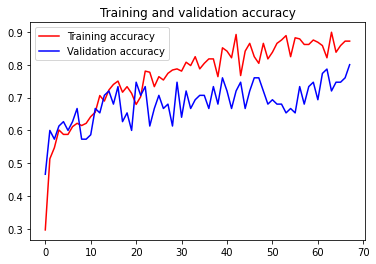

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [29]:
def download_history():
  import pickle
  from google.colab import files

  with open('history_skin_type_80.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_skin_type_80.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print("dry ")  
  print(classes[0][0])
  print("normal ")
  print(classes[0][1])
  print("oily ")
  print(classes[0][2])
  print("sensitive ")
  print(classes[0][3])
  # if classes[0]>0.5:
  #   print(fn + " is a human")
  # else:
  #   print(fn + " is a horse")
 

Saving WhatsApp Image 2022-05-21 at 7.53.52 PM.jpeg to WhatsApp Image 2022-05-21 at 7.53.52 PM (1).jpeg
[0.05726071 0.90315914 0.03842711 0.00115297]
dry 
0.057260707
normal 
0.90315914
oily 
0.038427114
sensitive 
0.0011529662


In [ ]:

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
path = './gdrive/MyDrive/Model-ML'
model.save(path+'/saved_model/my_skin_type_model_80')

INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Model-ML/saved_model/my_skin_type_model_80/assets


In [36]:
from keras.models import load_model

MODEL_PATH = './gdrive/MyDrive/Model-ML/skin-type-model-80.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)